In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

In [17]:
cats_df = pd.read_csv('data/categories.csv')
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [19]:
cats_df

,CategoryID,CategoryName
0,0,Монитор
1,1,Мультимедиа акустика
2,2,Портативная акустика
3,3,Чехол/защитное стекло для телефона
4,4,Мобильный телефон
...,...,...
62,62,Виниловая пластинка
63,63,ТВ-антенна
64,64,Оборудование для предметной съемки
65,65,Аксессуар для ноутбука


In [21]:
train_df = train_df.merge(cats_df, on='CategoryID', how='left')
train_df

,ID,CategoryID,Query,CategoryName
0,1,1,edifier,Мультимедиа акустика
1,2,2,умная колонка яндекс станция лайт,Портативная акустика
2,3,3,чехол iphone 14 pro,Чехол/защитное стекло для телефона
3,4,4,zte,Мобильный телефон
4,5,5,ноутбук huawei matebook b3-520 53012kfg,Ноутбук
...,...,...,...,...
11553,14118,6,ssd диск samsung 980 pro nvme 2tb (mz-v8p2t0bw),Жесткий диск/SSD
11554,14119,42,usb-хаб ugreen cr106 / 20277 (черный),Док-станция/репликатор для ноутбука
11555,14120,5,ноутбук huawei matebook d14 nbd-wdi9 (космичес...,Ноутбук
11556,14121,10,телевизор samsung ue65au7002uxru,Телевизор


In [23]:
missing_values = train_df.isnull().sum()
print(missing_values)

ID              0
CategoryID      0
Query           0
CategoryName    0
dtype: int64


In [8]:
unique_counts1 = train_df.nunique()
print(unique_counts1)

ID              11558
CategoryID         66
Query           11489
CategoryName       66
dtype: int64


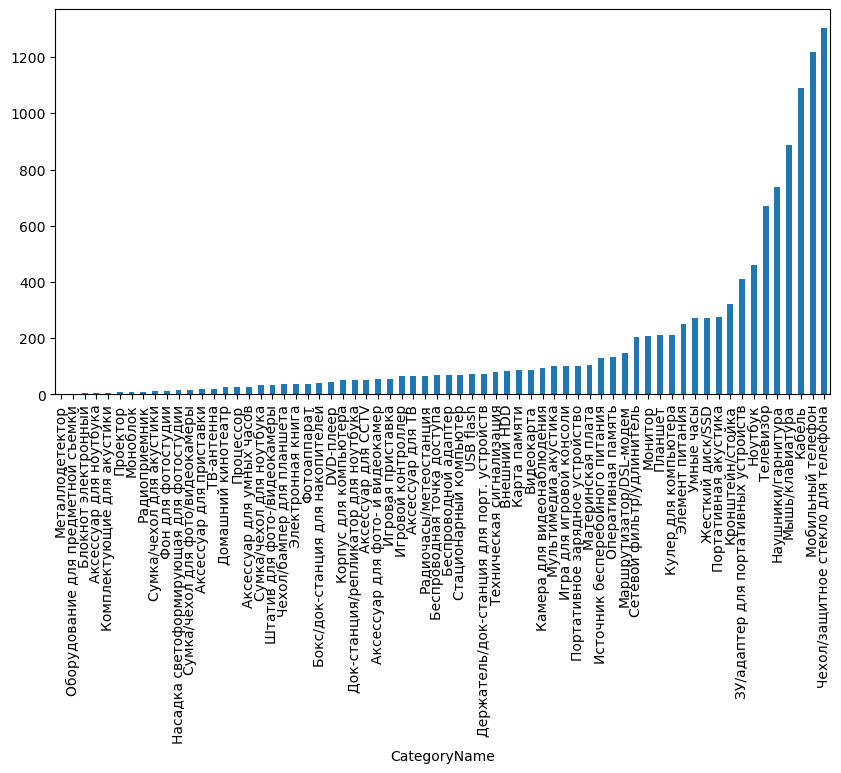

In [9]:
fig, ax = plt.subplots(1,1, figsize=(10, 5))
train_df.groupby('CategoryName').Query.count().sort_values().plot.bar(x='CategoryName', y='Query')
plt.xticks(rotation=90)
plt.show()

In [11]:
counts = train_df['CategoryName'].value_counts().reset_index()
counts.columns = ['CategoryName', 'count'] 
categories_to_keep=[]
for i in range(len(counts)):  
        categories_to_keep.append(counts.iloc[i]['CategoryName'])
        print(f"{counts.iloc[i]['CategoryName']}: {counts.iloc[i]['count']}")
print(len(categories_to_keep))

Чехол/защитное стекло для телефона: 1304
Мобильный телефон: 1218
Кабель: 1089
Мышь/клавиатура: 887
Наушники/гарнитура: 739
Телевизор: 672
Ноутбук: 460
ЗУ/адаптер для портативных устройств: 409
Кронштейн/стойка: 323
Портативная акустика: 276
Жесткий диск/SSD: 273
Умные часы: 272
Элемент питания: 249
Кулер для компьютера: 213
Планшет: 210
Монитор: 207
Сетевой фильтр/удлинитель: 206
Маршрутизатор/DSL-модем: 149
Оперативная память: 135
Источник бесперебойного питания: 131
Материнская плата: 104
Портативное зарядное устройство: 102
Игра для игровой консоли: 101
Мультимедиа акустика: 100
Камера для видеонаблюдения: 95
Видеокарта: 88
Карта памяти: 86
Внешний HDD: 82
Техническая сигнализация: 79
Держатель/док-станция для порт. устройств: 74
USB flash: 72
Стационарный компьютер: 70
Беспроводной адаптер: 69
Беспроводная точка доступа: 68
Радиочасы/метеостанция: 67
Аксессуар для ТВ: 65
Игровой контроллер: 64
Аксессуар для фото- и видеокамер: 54
Игровая приставка: 54
Док-станция/репликатор для ноу

In [ ]:
Был проведен анализ данных: пропусков нет, есть повторы. Решил ничего не изменять

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import numpy as np

In [ ]:
обработка текста для подачи tf-idf

In [46]:
import re
from nltk.corpus import stopwords
from pymorphy3 import MorphAnalyzer

morph = MorphAnalyzer()
stop_words = set(stopwords.words('russian'))  # Укажите язык

def preprocess_text(text):
    # Приведение к нижнему регистру
    text = text.lower()
    text = re.sub(r'[/.,"\'\\\[\](){}<>;:\-+=!@#$%^&*]', '', text)  # Удалить указанные символы
    text = re.sub(r'\s+', ' ', text)  # Сжать пробелы
    text = text.strip()
    text = ' '.join(morph.parse(word)[0].normal_form for word in text.split() if word not in stop_words)
    return text

In [15]:
Q = train_df['Query'].apply(preprocess_text)

In [16]:
tfidf = TfidfVectorizer(max_features=10000) 
X = tfidf.fit_transform(Q).toarray()

In [17]:
# Инициализируем t-SNE
tsne = TSNE(
    n_components=2,  
    perplexity=30,   
    random_state=42,
    n_iter=1000
)

# Применяем к данным
X_tsne = tsne.fit_transform(X)

C:\Users\Oleg\AppData\Local\Temp\ipykernel_29244\2485543859.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


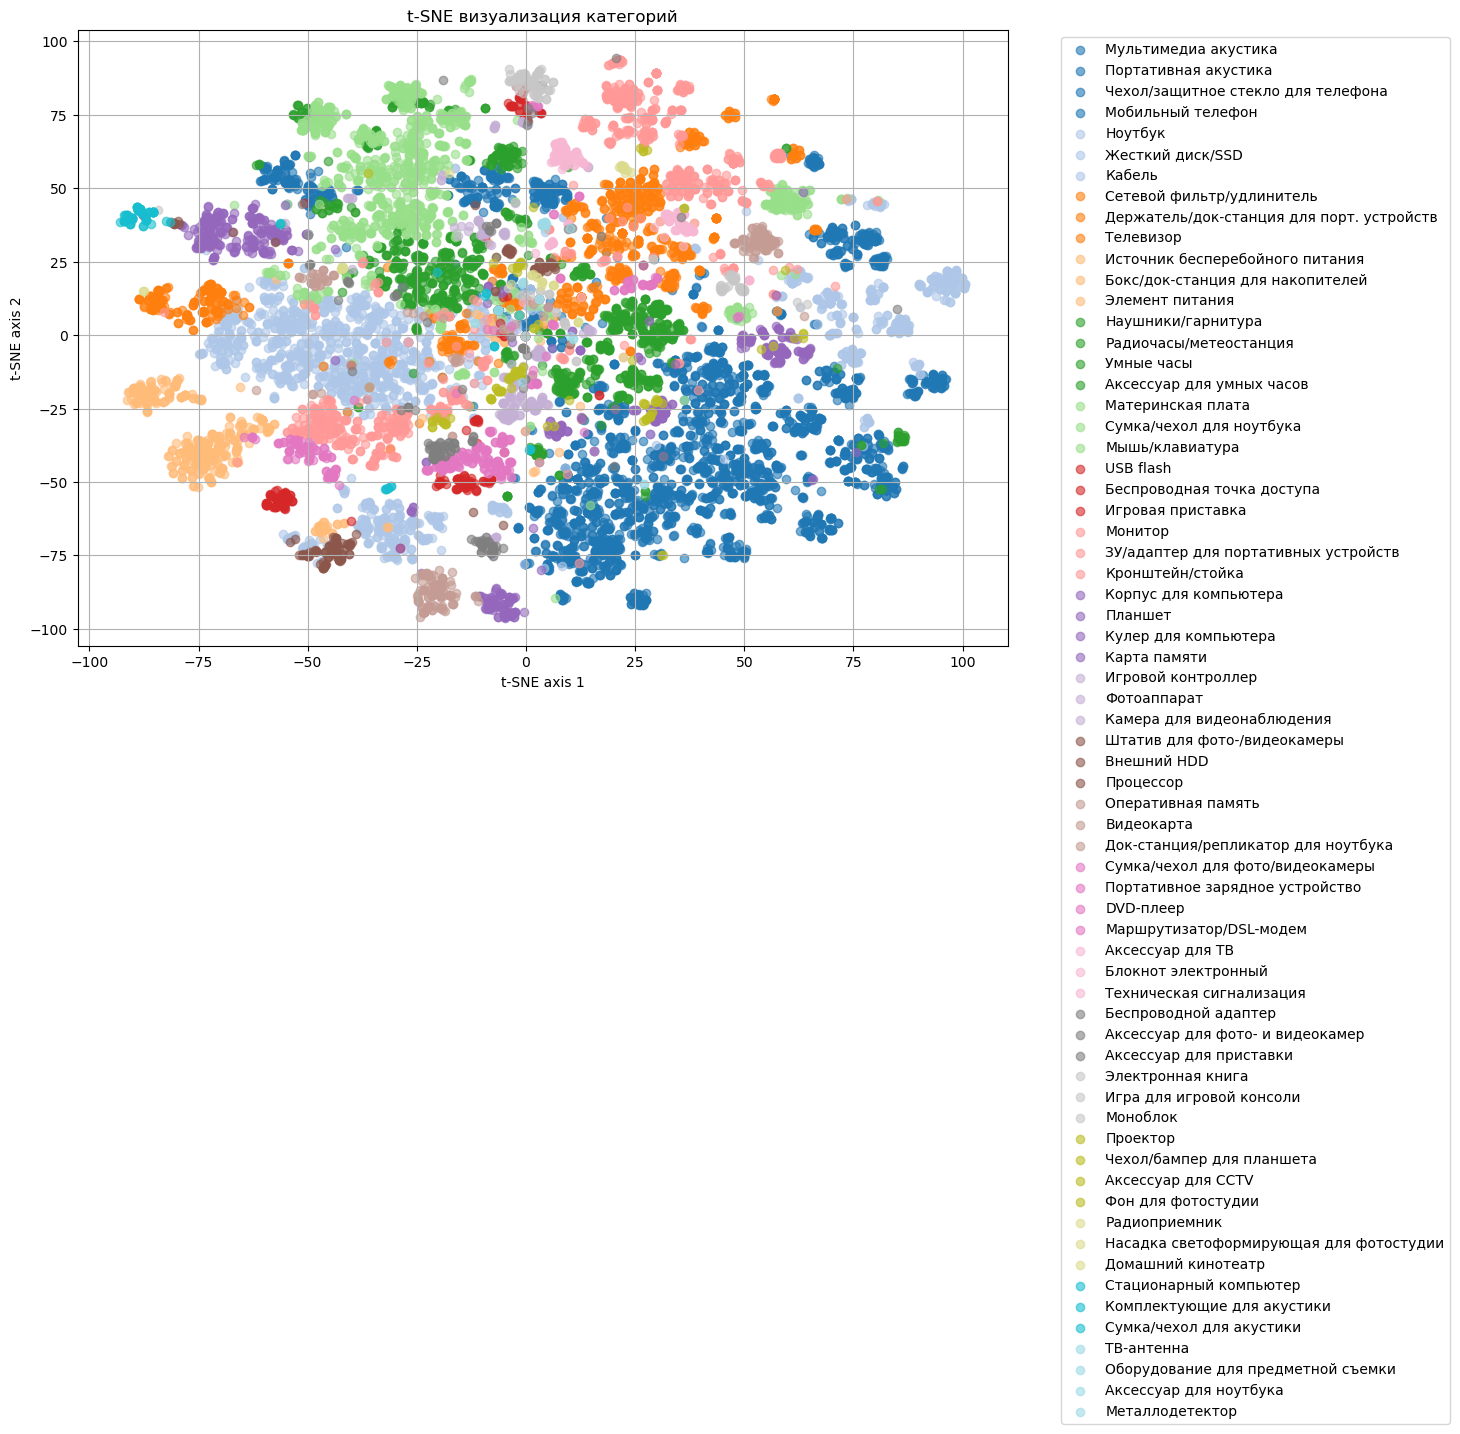

In [19]:
plt.figure(figsize=(12, 8))

# Цвета для каждой категории
categories = train_df["CategoryName"].unique()
colors = plt.cm.tab20(np.linspace(0, 1, len(categories)))

# Рисуем точки для каждой категории
for i, cat in enumerate(categories):
    mask = train_df["CategoryName"] == cat
    plt.scatter(
        X_tsne[mask, 0], 
        X_tsne[mask, 1], 
        c=[colors[i]], 
        label=cat,
        alpha=0.6
    )

plt.title("t-SNE визуализация категорий")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("t-SNE axis 1")
plt.ylabel("t-SNE axis 2")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
ЛОГ РЕГРЕССИЯ

In [21]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(Q, train_df['CategoryName'], test_size=0.2, random_state=42)

# Обучаем TF-IDF только на обучающих данных
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Берем обычную логистическую регрессию
clf = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
clf.fit(X_train_tfidf, y_train)

# Предсказания
y_pred = clf.predict(X_test_tfidf)  # Используем преобразованные тестовые данные

# Смотрим метрики
print(classification_report(y_test, y_pred, zero_division=0))

                                           precision    recall  f1-score   support

                                DVD-плеер       0.85      0.85      0.85        13
                                USB flash       0.67      0.94      0.78        17
                       Аксессуар для CCTV       1.00      1.00      1.00        10
                         Аксессуар для ТВ       1.00      0.88      0.93        16
                   Аксессуар для ноутбука       0.00      0.00      0.00         1
                  Аксессуар для приставки       0.20      0.33      0.25         3
                Аксессуар для умных часов       0.83      0.71      0.77         7
         Аксессуар для фото- и видеокамер       1.00      0.92      0.96        12
               Беспроводная точка доступа       0.67      0.89      0.76         9
                     Беспроводной адаптер       0.67      0.86      0.75        14
                      Блокнот электронный       1.00      1.00      1.00         1
   

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Определение модели
rf = RandomForestClassifier(random_state=42)

# Настройка параметров с помощью GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced', None]
}

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search_rf.fit(X_train_tfidf, y_train)

# Лучшие параметры
print("Лучшие параметры случайного леса:", grid_search_rf.best_params_)

# Предсказания
y_pred_rf = grid_search_rf.predict(X_test_tfidf)

# Смотрим метрики
print(classification_report(y_test, y_pred_rf, zero_division=0))

D:\Programs\Anaconda\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Лучшие параметры случайного леса: {'class_weight': None, 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
                                           precision    recall  f1-score   support

                                DVD-плеер       1.00      0.69      0.82        13
                                USB flash       1.00      0.94      0.97        17
                       Аксессуар для CCTV       1.00      0.80      0.89        10
                         Аксессуар для ТВ       1.00      0.81      0.90        16
                   Аксессуар для ноутбука       0.00      0.00      0.00         1
                  Аксессуар для приставки       1.00      0.33      0.50         3
                Аксессуар для умных часов       1.00      0.43      0.60         7
         Аксессуар для фото- и видеокамер       1.00      0.83      0.91        12
               Беспроводная точка доступа       0.62      0.89      0.73         9
                     Беспроводной адаптер       

In [41]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import classification_report

# Преобразование меток классов
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Обучение модели Random Forest
rf = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [100, 200, 400],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced', None]
}
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search_rf.fit(X_train_tfidf, y_train_encoded)

# Лучшие параметры случайного леса
print("Лучшие параметры случайного леса:", grid_search_rf.best_params_)

# Предсказания для случайного леса
y_pred_rf = grid_search_rf.predict(X_test_tfidf)

# Получение уникальных классов из предсказаний
unique_classes_rf = list(set(y_pred_rf))

# Метрики для случайного леса
print("Метрики для случайного леса:")
print(classification_report(y_test_encoded, y_pred_rf, target_names=label_encoder.classes_, labels=unique_classes_rf, zero_division=0))

# Обучение модели XGBoost
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
param_grid_xgb = {
    'n_estimators': [100, 200, 400],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.001, 0.0001],
    'class_weight': ['balanced', None]
}
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search_xgb.fit(X_train_tfidf, y_train_encoded)

# Лучшие параметры XGBoost
print("Лучшие параметры XGBoost:", grid_search_xgb.best_params_)

# Предсказания для XGBoost
y_pred_xgb = grid_search_xgb.predict(X_test_tfidf)

# Получение уникальных классов из предсказаний
unique_classes_xgb = list(set(y_pred_xgb))

# Метрики для XGBoost
print("Метрики для XGBoost:")
print(classification_report(y_test_encoded, y_pred_xgb, target_names=label_encoder.classes_, labels=unique_classes_xgb, zero_division=0))

D:\Programs\Anaconda\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Лучшие параметры случайного леса: {'class_weight': None, 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Метрики для случайного леса:


D:\Programs\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:2620: UserWarning: labels size, 60, does not match size of target_names, 66
  warnings.warn(
D:\Programs\Anaconda\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


                                           precision    recall  f1-score   support

                                DVD-плеер       1.00      0.69      0.82        13
                                USB flash       1.00      0.94      0.97        17
                       Аксессуар для CCTV       1.00      0.80      0.89        10
                         Аксессуар для ТВ       1.00      0.81      0.90        16
                   Аксессуар для ноутбука       1.00      0.33      0.50         3
                  Аксессуар для приставки       1.00      0.43      0.60         7
                Аксессуар для умных часов       1.00      0.83      0.91        12
         Аксессуар для фото- и видеокамер       0.62      0.89      0.73         9
               Беспроводная точка доступа       1.00      0.64      0.78        14
                     Беспроводной адаптер       1.00      1.00      1.00         1
                      Блокнот электронный       1.00      0.75      0.86        12
   

KeyboardInterrupt: 

In [ ]:
НЕЙРОСЕКТЬ

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import LabelEncoder
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import XLMRobertaTokenizer, XLMRobertaForSequenceClassification
from torch.optim import AdamW
from tqdm import tqdm
import torch.nn as nn
import torch
from tqdm import tqdm

In [47]:

le = LabelEncoder()
train_df['label'] = le.fit_transform(train_df['CategoryName'])

# Разделение данных
train, val = train_test_split(train_df, test_size=0.2, random_state=42)

In [48]:
from torch.utils.data import Dataset, DataLoader
from transformers import XLMRobertaTokenizer

tokenizer = XLMRobertaTokenizer.from_pretrained('xlm-roberta-base')
MAX_LEN = 128  # Оптимизируйте под ваши данные

class CustomDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encoding = tokenizer(
            self.texts[idx],
            max_length=MAX_LEN,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(self.labels[idx], dtype=torch.long)
        }

# Создание DataLoader
train_dataset = CustomDataset(train['Query'].tolist(), train['label'].tolist())
val_dataset = CustomDataset(val['Query'].tolist(), val['label'].tolist())

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)

In [49]:
import torch
import torch.nn as nn
from transformers import XLMRobertaModel, XLMRobertaConfig

class EnhancedXLMRobertaClassifier(nn.Module):
    def __init__(self, num_classes, hidden_dim=1024, dropout=0.2):
        super().__init__()
        
        # Загрузка предобученной модели
        config = XLMRobertaConfig.from_pretrained('xlm-roberta-large', 
                                                output_hidden_states=True)
        self.roberta = XLMRobertaModel.from_pretrained('xlm-roberta-large', 
                                                      config=config)
        
        # Замораживаем все слои, кроме последних 3
        for name, param in self.roberta.named_parameters():
            if 'layer.21' in name or 'layer.22' in name or 'layer.23' in name:
                param.requires_grad = True
            else:
                param.requires_grad = False
        
        # Усложненная классификационная голова
        self.classifier = nn.Sequential(
            nn.Linear(self.roberta.config.hidden_size * 2, hidden_dim),
            nn.BatchNorm1d(hidden_dim),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.GELU(),
            nn.Linear(hidden_dim // 2, num_classes)
        )
    
    def forward(self, input_ids, attention_mask, return_embeddings=False):
        outputs = self.roberta(input_ids, attention_mask=attention_mask)
        
        # Используем скрытые состояния из последнего и предпоследнего слоев
        last_layer = outputs.last_hidden_state[:, 0, :]  # [CLS] последнего слоя
        second_last_layer = outputs.hidden_states[-2][:, 0, :]  # [CLS] предпоследнего
        combined = torch.cat([last_layer, second_last_layer], dim=-1)
        
        if return_embeddings:
            return combined  # Возвращаем только эмбеддинги
        return self.classifier(combined)  # Возвращаем предсказания
    
    def get_embeddings(self, input_ids, attention_mask):
        """Отдельный метод для получения эмбеддингов"""
        with torch.no_grad():
            return self.forward(input_ids, attention_mask, return_embeddings=True)

In [66]:
train_df

,ID,CategoryID,Query,CategoryName,label,NewCategory
0,1,1,edifier,Мультимедиа акустика,1,Аудиоустройства
1,2,2,умная колонка яндекс станция лайт,Портативная акустика,1,Аудиоустройства
2,3,3,чехол iphone 14 pro,Чехол/защитное стекло для телефона,0,Аксессуары для гаджетов
3,4,4,zte,Мобильный телефон,5,Мобильные устройства
4,5,5,ноутбук huawei matebook b3-520 53012kfg,Ноутбук,3,Компьютеры и комплектующие
...,...,...,...,...,...,...
11553,14118,6,ssd диск samsung 980 pro nvme 2tb (mz-v8p2t0bw),Жесткий диск/SSD,12,Хранение данных
11554,14119,42,usb-хаб ugreen cr106 / 20277 (черный),Док-станция/репликатор для ноутбука,7,Прочие электроника
11555,14120,5,ноутбук huawei matebook d14 nbd-wdi9 (космичес...,Ноутбук,3,Компьютеры и комплектующие
11556,14121,10,телевизор samsung ue65au7002uxru,Телевизор,10,ТВ и медиа


In [50]:
# Инициализация
model = EnhancedXLMRobertaClassifier(num_classes=66)

Используется устройство: cuda:0
Устройство модели: cuda:0


Эпоха 1/20: 100%|████████████████████████████████████████████████████████████████████| 578/578 [01:28<00:00,  6.56it/s]



Эпоха 1:
  Train Loss: 3.1989
  Val Loss: 1.8797
  Val Accuracy: 0.5804


Эпоха 2/20: 100%|████████████████████████████████████████████████████████████████████| 578/578 [01:28<00:00,  6.55it/s]



Эпоха 2:
  Train Loss: 1.7887
  Val Loss: 1.2707
  Val Accuracy: 0.7050


Эпоха 3/20: 100%|████████████████████████████████████████████████████████████████████| 578/578 [01:28<00:00,  6.52it/s]



Эпоха 3:
  Train Loss: 1.3058
  Val Loss: 0.9332
  Val Accuracy: 0.7894


Эпоха 4/20: 100%|████████████████████████████████████████████████████████████████████| 578/578 [01:28<00:00,  6.51it/s]



Эпоха 4:
  Train Loss: 0.9941
  Val Loss: 0.7349
  Val Accuracy: 0.8326


Эпоха 5/20: 100%|████████████████████████████████████████████████████████████████████| 578/578 [01:28<00:00,  6.51it/s]



Эпоха 5:
  Train Loss: 0.8134
  Val Loss: 0.6242
  Val Accuracy: 0.8512


Эпоха 6/20: 100%|████████████████████████████████████████████████████████████████████| 578/578 [01:28<00:00,  6.50it/s]



Эпоха 6:
  Train Loss: 0.6719
  Val Loss: 0.5433
  Val Accuracy: 0.8629


Эпоха 7/20: 100%|████████████████████████████████████████████████████████████████████| 578/578 [01:29<00:00,  6.49it/s]



Эпоха 7:
  Train Loss: 0.5835
  Val Loss: 0.4801
  Val Accuracy: 0.8789


Эпоха 8/20: 100%|████████████████████████████████████████████████████████████████████| 578/578 [01:29<00:00,  6.47it/s]



Эпоха 8:
  Train Loss: 0.5178
  Val Loss: 0.4399
  Val Accuracy: 0.8880


Эпоха 9/20: 100%|████████████████████████████████████████████████████████████████████| 578/578 [01:29<00:00,  6.42it/s]



Эпоха 9:
  Train Loss: 0.4646
  Val Loss: 0.4077
  Val Accuracy: 0.8971


Эпоха 10/20: 100%|███████████████████████████████████████████████████████████████████| 578/578 [01:29<00:00,  6.46it/s]



Эпоха 10:
  Train Loss: 0.4137
  Val Loss: 0.3852
  Val Accuracy: 0.9044


Эпоха 11/20: 100%|███████████████████████████████████████████████████████████████████| 578/578 [01:29<00:00,  6.46it/s]



Эпоха 11:
  Train Loss: 0.3824
  Val Loss: 0.3628
  Val Accuracy: 0.9118


Эпоха 12/20: 100%|███████████████████████████████████████████████████████████████████| 578/578 [01:29<00:00,  6.46it/s]



Эпоха 12:
  Train Loss: 0.3447
  Val Loss: 0.3547
  Val Accuracy: 0.9135


Эпоха 13/20: 100%|███████████████████████████████████████████████████████████████████| 578/578 [01:29<00:00,  6.44it/s]



Эпоха 13:
  Train Loss: 0.3099
  Val Loss: 0.3321
  Val Accuracy: 0.9152


Эпоха 14/20: 100%|███████████████████████████████████████████████████████████████████| 578/578 [01:29<00:00,  6.46it/s]



Эпоха 14:
  Train Loss: 0.2897
  Val Loss: 0.3316
  Val Accuracy: 0.9234


Эпоха 15/20: 100%|███████████████████████████████████████████████████████████████████| 578/578 [01:28<00:00,  6.50it/s]



Эпоха 15:
  Train Loss: 0.2737
  Val Loss: 0.3247
  Val Accuracy: 0.9243


Эпоха 16/20: 100%|███████████████████████████████████████████████████████████████████| 578/578 [01:30<00:00,  6.42it/s]



Эпоха 16:
  Train Loss: 0.2505
  Val Loss: 0.3245
  Val Accuracy: 0.9247


Эпоха 17/20: 100%|███████████████████████████████████████████████████████████████████| 578/578 [01:29<00:00,  6.49it/s]



Эпоха 17:
  Train Loss: 0.2339
  Val Loss: 0.3058
  Val Accuracy: 0.9265


Эпоха 18/20: 100%|███████████████████████████████████████████████████████████████████| 578/578 [01:29<00:00,  6.44it/s]



Эпоха 18:
  Train Loss: 0.2182
  Val Loss: 0.3100
  Val Accuracy: 0.9295


Эпоха 19/20: 100%|███████████████████████████████████████████████████████████████████| 578/578 [01:29<00:00,  6.43it/s]



Эпоха 19:
  Train Loss: 0.2040
  Val Loss: 0.3069
  Val Accuracy: 0.9312


Эпоха 20/20: 100%|███████████████████████████████████████████████████████████████████| 578/578 [01:33<00:00,  6.15it/s]



Эпоха 20:
  Train Loss: 0.1917
  Val Loss: 0.3090
  Val Accuracy: 0.9299


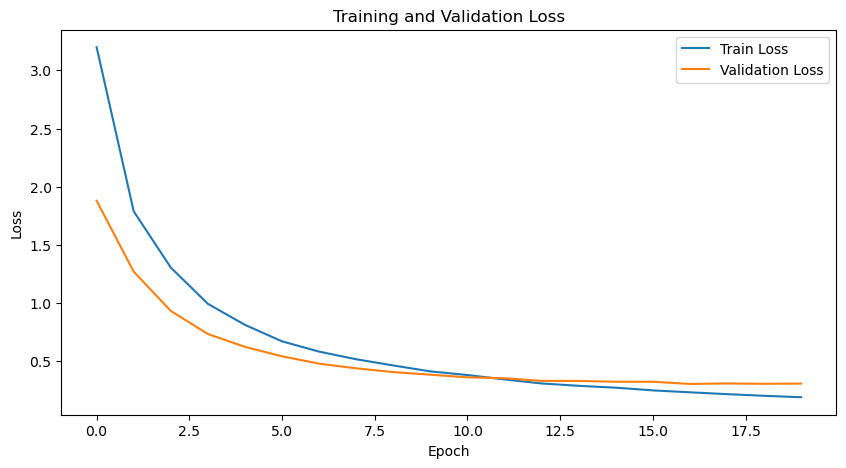

In [52]:
import torch
from tqdm import tqdm
from torch.optim import AdamW

# 1. Инициализация устройства
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f"Используется устройство: {device}")

# 2. Убедимся, что модель на правильном устройстве
model = model.to(device)
print(f"Устройство модели: {next(model.parameters()).device}")

# 3. Инициализация оптимизатора
optimizer = AdamW(model.parameters(), lr=1e-5, weight_decay=0.01)
criterion = torch.nn.CrossEntropyLoss().to(device)

# 4. История для сохранения лоссов
history = {'train_loss': [], 'val_loss': [], 'val_acc': []}

EPOCHS = 20
# 5. Обучение с отслеживанием лосса
for epoch in range(EPOCHS):
    model.train()
    epoch_train_loss = 0
    processed_samples = 0
    
    for batch in tqdm(train_loader, desc=f"Эпоха {epoch+1}/{EPOCHS}"):
        try:
            # Перенос данных на устройство
            batch = {k: v.to(device) for k, v in batch.items()}
            
            optimizer.zero_grad()
            
            # Forward pass
            outputs = model(
                input_ids=batch['input_ids'],
                attention_mask=batch['attention_mask']
            )
            loss = criterion(outputs, batch['label'])
            
            # Backward pass
            loss.backward()
            optimizer.step()
            
            # Сбор статистики
            epoch_train_loss += loss.item() * len(batch['label'])
            processed_samples += len(batch['label'])
            
        except RuntimeError as e:
            print(f"Ошибка: {e}")
            print("Проверка устройств:")
            print(f"- Модель: {next(model.parameters()).device}")
            print(f"- input_ids: {batch['input_ids'].device}")
            raise
    
    # Вычисляем средний лосс на эпохе
    avg_train_loss = epoch_train_loss / processed_samples
    history['train_loss'].append(avg_train_loss)
    
    # Валидация
    model.eval()
    val_loss, correct = 0, 0
    total_val_samples = 0
    
    with torch.no_grad():
        for batch in val_loader:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(
                input_ids=batch['input_ids'],
                attention_mask=batch['attention_mask']
            )
            val_loss += criterion(outputs, batch['label']).item() * len(batch['label'])
            preds = torch.argmax(outputs, dim=1)
            correct += (preds == batch['label']).sum().item()
            total_val_samples += len(batch['label'])
    
    # Сохраняем метрики валидации
    avg_val_loss = val_loss / total_val_samples
    val_acc = correct / total_val_samples
    history['val_loss'].append(avg_val_loss)
    history['val_acc'].append(val_acc)
    
    # Вывод метрик
    print(f"\nЭпоха {epoch+1}:")
    print(f"  Train Loss: {avg_train_loss:.4f}")
    print(f"  Val Loss: {avg_val_loss:.4f}")
    print(f"  Val Accuracy: {val_acc:.4f}")

    torch.cuda.empty_cache()

# Визуализация лоссов (опционально)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

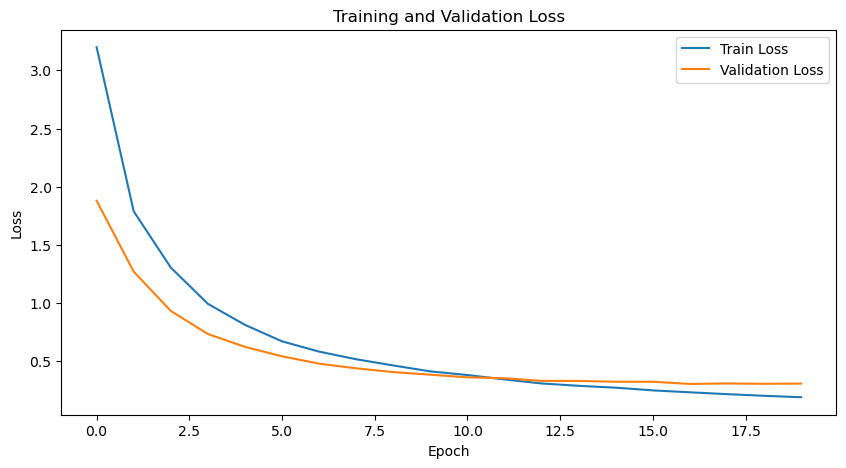

In [54]:
# Визуализация лоссов (опционально)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
По графику видно, что лоссы не сильно расходятся. Переобучения не должно быть

In [53]:
import torch
from sklearn.metrics import classification_report, precision_recall_fscore_support
from tqdm import tqdm

def evaluate_model(model, val_loader, le):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in tqdm(val_loader, desc="Evaluation"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            logits = model(input_ids, attention_mask)
            preds = torch.argmax(logits, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    str_true_labels = le.inverse_transform(all_labels)
    str_pred_labels = le.inverse_transform(all_preds)

    return str_true_labels, str_pred_labels

# Вызов функции
true_labels, pred_labels = evaluate_model(model, val_loader, le)

# Метрики
print("Classification Report:")
print(classification_report(true_labels, pred_labels, digits=4))

# Дополнительные метрики
macro_prec, macro_rec, macro_f1, _ = precision_recall_fscore_support(
    true_labels, pred_labels, average='macro'
)
micro_prec, micro_rec, micro_f1, _ = precision_recall_fscore_support(
    true_labels, pred_labels, average='micro'
)

print("\nMacro Averages:")
print(f"Precision: {macro_prec:.4f}")
print(f"Recall:    {macro_rec:.4f}")
print(f"F1-score:  {macro_f1:.4f}")

print("\nMicro Averages:")
print(f"Precision: {micro_prec:.4f}")
print(f"Recall:    {micro_rec:.4f}")
print(f"F1-score:  {micro_f1:.4f}")

Evaluation: 100%|████████████████████████████████████████████████████████████████████| 145/145 [00:17<00:00,  8.12it/s]


Classification Report:
                                           precision    recall  f1-score   support

                                DVD-плеер     1.0000    0.8462    0.9167        13
                                USB flash     0.8889    0.9412    0.9143        17
                       Аксессуар для CCTV     0.8182    0.9000    0.8571        10
                         Аксессуар для ТВ     0.9375    0.9375    0.9375        16
                   Аксессуар для ноутбука     0.0000    0.0000    0.0000         1
                  Аксессуар для приставки     0.0000    0.0000    0.0000         3
                Аксессуар для умных часов     1.0000    0.7143    0.8333         7
         Аксессуар для фото- и видеокамер     0.9167    0.9167    0.9167        12
               Беспроводная точка доступа     0.8000    0.8889    0.8421         9
                     Беспроводной адаптер     0.6667    0.8571    0.7500        14
                      Блокнот электронный     1.0000    1.0000 

D:\Programs\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Programs\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Programs\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Programs\Anaconda\Lib\site-packages\sklearn\metri

Тут представлены эмбеддинги до обучения и после

C:\Users\Oleg\AppData\Local\Temp\ipykernel_29244\2903354723.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  palette = plt.cm.get_cmap('tab20', len(unique_categories))
C:\Users\Oleg\AppData\Local\Temp\ipykernel_29244\2903354723.py:42: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


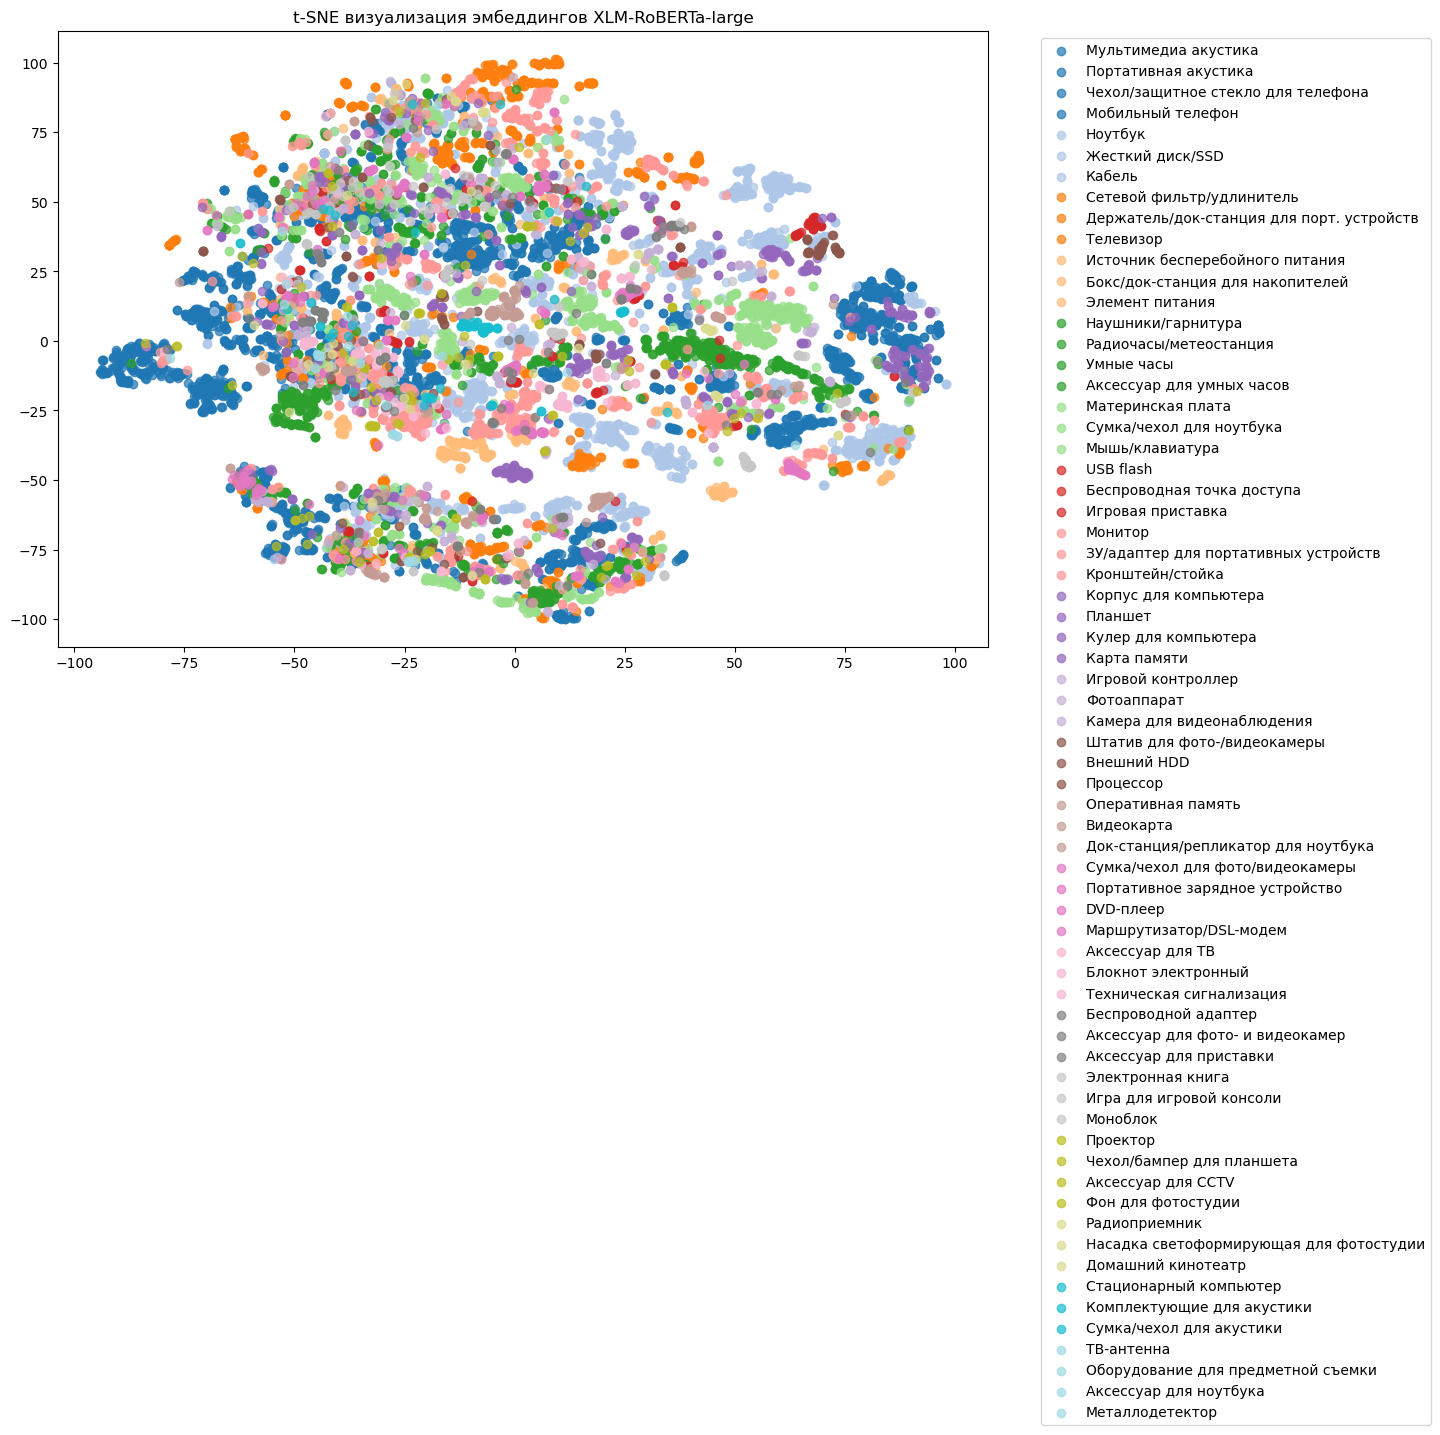

In [71]:
model_name = "xlm-roberta-large"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = XLMRobertaModel.from_pretrained(model_name)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

def get_embeddings(texts):
    embeddings = []
    for text in texts:
        inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
        inputs = {k: v.to(device) for k, v in inputs.items()}
        
        with torch.no_grad():
            outputs = model(**inputs)
            # Берем [CLS] токен последнего слоя
            emb = outputs.last_hidden_state[:, 0, :].cpu().numpy()
            embeddings.append(emb)
    
    return np.vstack(embeddings)

texts = train_df["Query"].tolist()
embeddings = get_embeddings(texts)

# Создаем цветовую карту
unique_categories = train_df["CategoryName"].unique()
palette = plt.cm.get_cmap('tab20', len(unique_categories))
color_map = {category: palette(i) for i, category in enumerate(unique_categories)}

# Применяем t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=min(30, len(texts)-1))
embeddings_2d = tsne.fit_transform(embeddings)

# Визуализация
plt.figure(figsize=(12, 8))
for category in unique_categories:
    mask = train_df["CategoryName"] == category
    plt.scatter(embeddings_2d[mask, 0], embeddings_2d[mask, 1],
               color=color_map[category], label=category, alpha=0.7)

plt.title("t-SNE визуализация эмбеддингов XLM-RoBERTa-large")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\Oleg\AppData\Local\Temp\ipykernel_29244\917653102.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab20", len(unique_categories))


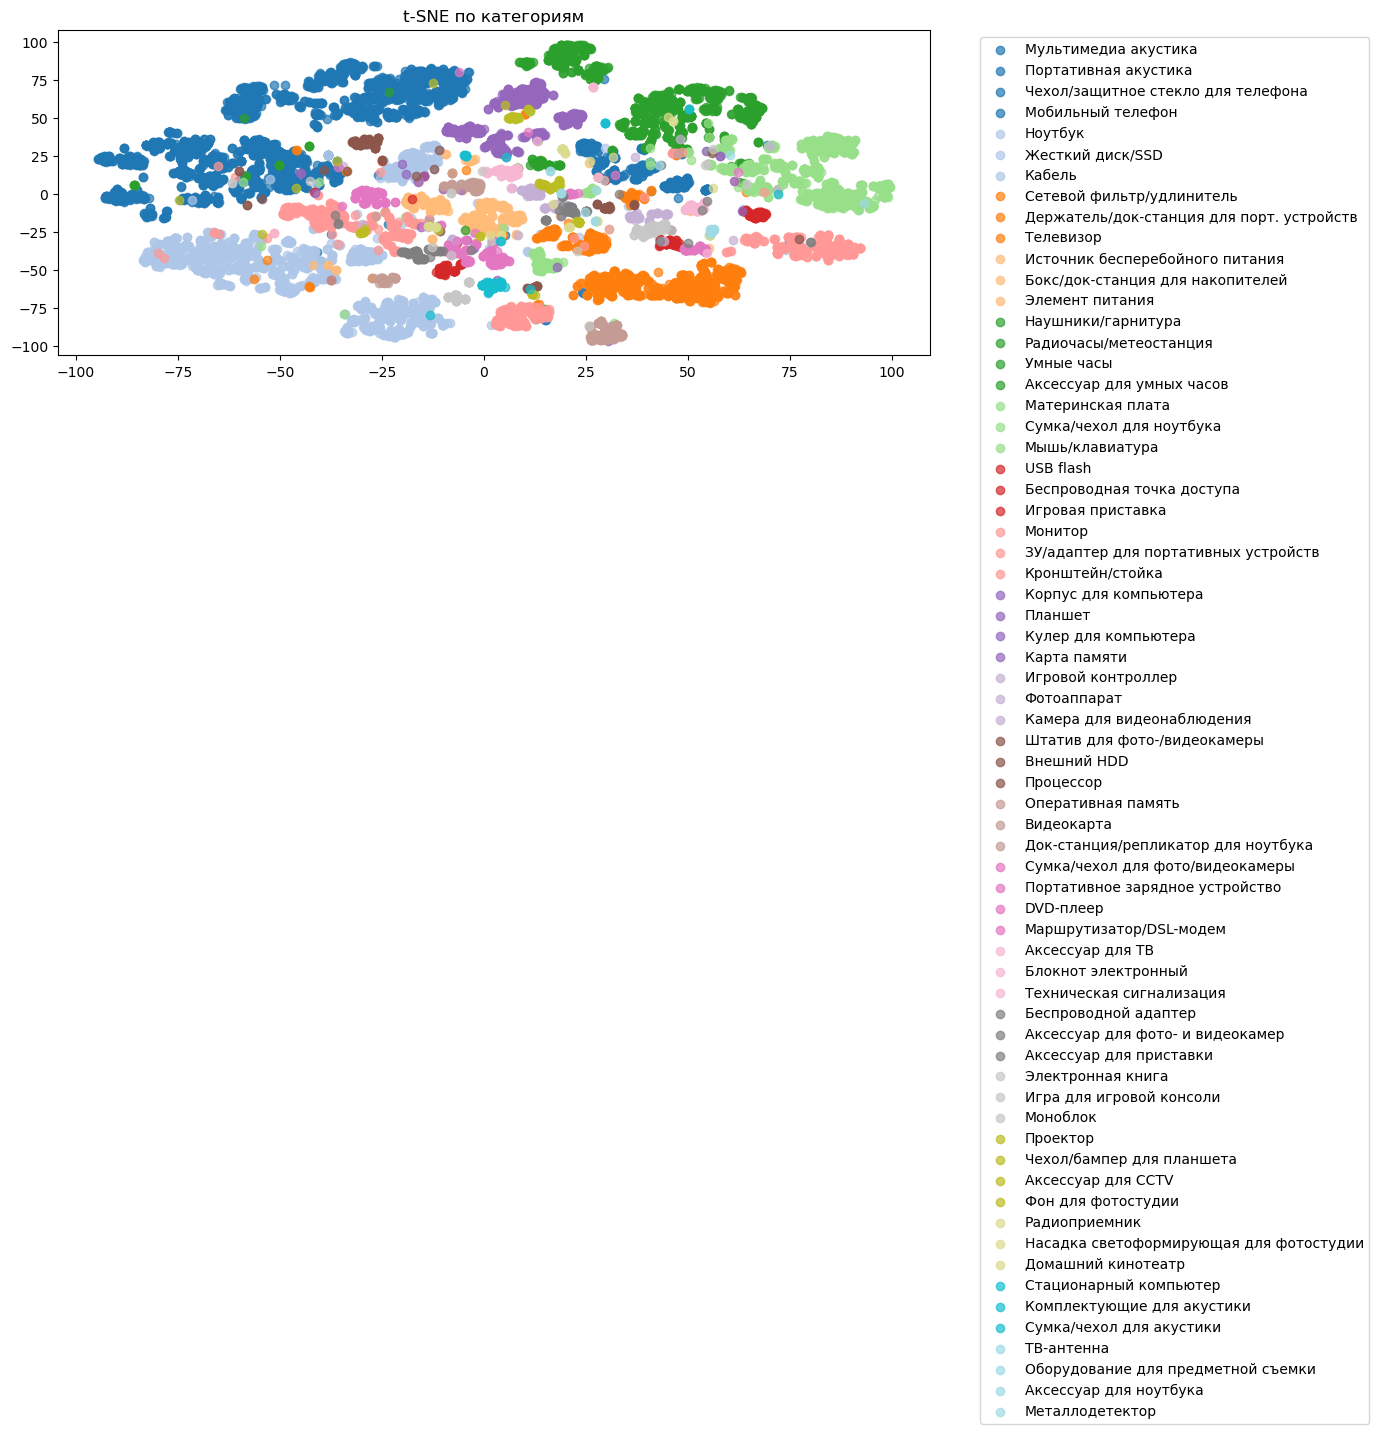

In [69]:
texts = train_df["Query"].tolist()
labels = train_df["CategoryName"].tolist()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
model.eval()

embeddings = []
for text in texts:
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=128)
    inputs = {k: v.to(device) for k, v in inputs.items()}
    
    with torch.no_grad():
        emb = model.get_embeddings(inputs["input_ids"], inputs["attention_mask"])
        embeddings.append(emb.cpu().numpy())

embeddings = np.vstack(embeddings)

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
embeddings_2d = tsne.fit_transform(embeddings)

unique_categories = train_df["CategoryName"].unique()
colors = plt.cm.get_cmap("tab20", len(unique_categories))

plt.figure(figsize=(14, 10))
for i, category in enumerate(unique_categories):
    mask = np.array(labels) == category
    plt.scatter(embeddings_2d[mask, 0], embeddings_2d[mask, 1], 
                color=colors(i), label=category, alpha=0.7)

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.title("t-SNE по категориям")
plt.tight_layout()
plt.show()

In [55]:
import os
import torch
from transformers import AutoTokenizer
import joblib

# Пути для сохранения
MODEL_DIR = "/content/model"
TOKENIZER_DIR = "/content/tokenizer"

# Создаем директории, если они не существуют
os.makedirs(MODEL_DIR, exist_ok=True)
os.makedirs(TOKENIZER_DIR, exist_ok=True)

# 1. Сохраняем модель (3 способа на выбор)

# Способ 1: Только веса (рекомендуется)
torch.save(model.state_dict(), os.path.join(MODEL_DIR, "pytorch_model.bin"))

# Способ 2: Вся модель (если нужно сохранить архитектуру)
# torch.save(model, os.path.join(MODEL_DIR, "full_model.pth"))

# Способ 3: Для трансформеров (если используете Hugging Face)
# model.save_pretrained(MODEL_DIR)

# 2. Сохраняем конфигурацию (если есть)
if hasattr(model, 'config'):
    model.config.save_pretrained(MODEL_DIR)

# 3. Сохраняем токенизатор
tokenizer = AutoTokenizer.from_pretrained('xlm-roberta-base')
tokenizer.save_pretrained(TOKENIZER_DIR)

# 4. Сохраняем LabelEncoder
joblib.dump(le, os.path.join(MODEL_DIR, "label_encoder.pkl"))

# 5. Сохраняем информацию о классах (дополнительно)
with open(os.path.join(MODEL_DIR, "class_names.txt"), "w") as f:
    f.write("\n".join(le.classes_))

print(f"Модель успешно сохранена в {MODEL_DIR}")
print(f"Токенизатор сохранен в {TOKENIZER_DIR}")

Модель успешно сохранена в /content/model
Токенизатор сохранен в /content/tokenizer


In [56]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer
import joblib
from tqdm import tqdm
import os

# 1. Загрузка сохраненной модели и компонентов
MODEL_DIR = "/content/model"
TOKENIZER_DIR = "/content/tokenizer"
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Загрузка модели
model = EnhancedXLMRobertaClassifier(num_classes=len(joblib.load(os.path.join(MODEL_DIR, "label_encoder.pkl")).classes_))
model.load_state_dict(torch.load(os.path.join(MODEL_DIR, "pytorch_model.bin"), map_location=device),strict=False)
model.to(device)
model.eval()

# Загрузка токенизатора и LabelEncoder
tokenizer = AutoTokenizer.from_pretrained(TOKENIZER_DIR)
le = joblib.load(os.path.join(MODEL_DIR, "label_encoder.pkl"))

# 2. Загрузка тестовых данных
test_df = pd.read_csv('test.csv')  # Должен содержать колонку 'Query'
print(f"Загружено {len(test_df)} тестовых записей")

# 3. Создание Dataset для предсказаний
class PredictionDataset(Dataset):
    def __init__(self, texts, tokenizer, max_length=128):
        self.texts = texts
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        encoding = self.tokenizer(
            text,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten()
        }

test_dataset = PredictionDataset(test_df['Query'].tolist(), tokenizer)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# 4. Функция предсказания
def predict(model, data_loader, le):
    model.eval()
    predictions = []

    with torch.no_grad():
        for batch in tqdm(data_loader, desc="Предсказание"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)

            outputs = model(input_ids, attention_mask)
            batch_preds = torch.argmax(outputs, dim=1).cpu().numpy()
            batch_categories = le.inverse_transform(batch_preds)
            predictions.extend(batch_categories)

    return predictions

# 5. Выполнение предсказаний
predicted_categories = predict(model, test_loader, le)

# 6. Сохранение результатов
test_df['PredictedCategory'] = predicted_categories

# Если есть mapping категорий в ID (например, из categories.csv)
if os.path.exists('categories.csv'):
    categories_df = pd.read_csv('categories.csv')
    category_mapping = dict(zip(categories_df['CategoryName'], categories_df['CategoryID']))
    test_df['CategoryID'] = test_df['PredictedCategory'].map(category_mapping)
    output_cols = ['ID', 'Query', 'CategoryID', 'PredictedCategory']
else:
    output_cols = ['ID', 'Query', 'PredictedCategory']

# Сохранение в файл
output_path = '/content/test_predictions.csv'
test_df[output_cols].to_csv(output_path, index=False)

print(f"\nРезультаты сохранены в {output_path}")
print("\nПример предсказаний:")
print(test_df[output_cols].head())

Загружено 3899 тестовых записей


Предсказание: 100%|██████████████████████████████████████████████████████████████████| 122/122 [00:30<00:00,  4.06it/s]


Результаты сохранены в /content/test_predictions.csv

Пример предсказаний:
   ID                                              Query  CategoryID  \
0   0         xiaomi 2k gaming monitor g27qi p27qca-rggl           0   
1  15  смартфон xiaomi redmi note 14 8gb/256gb (полун...           4   
2  21                                           16 айфон           4   
3  22                                       cmf buds pro          14   
4  24                 защитное стекло samsung galaxy a25           3   

                    PredictedCategory  
0                             Монитор  
1                   Мобильный телефон  
2                   Мобильный телефон  
3                  Наушники/гарнитура  
4  Чехол/защитное стекло для телефона  


In [59]:
import pandas as pd

# Загрузка данных
df = pd.read_csv('/content/test_predictions.csv')

# Оставляем только колонку 'ID'
df_filtered = df[['ID','CategoryID']]
df_filtered.head()
# Сохранение в новый CSV
df_filtered.to_csv('5.csv', index=False)

In [58]:
df_filtered.head()

,ID,CategoryID
0,0,0
1,15,4
2,21,4
3,22,14
4,24,3


получили макро f1 = 0.81

теперь попробуим большой моделью предсказывать 1 большой класс а потом маленькой нужную котегорию

In [7]:
new_categories = {
    # Крупные категории
    "Мобильные устройства": [
        "Мобильный телефон", 
        "Планшет", 
        "Умные часы"
    ],
    "Аксессуары для гаджетов": [
        "Чехол/защитное стекло для телефона",
        "Кабель",
        "ЗУ/адаптер для портативных устройств",
        "Карта памяти",
        "USB flash",
        "Чехол/бампер для планшета",
        "Портативное зарядное устройство",
        "Держатель/док-станция для порт. устройств"
    ],
    "Компьютеры и комплектующие": [
        "Ноутбук",
        "Стационарный компьютер",
        "Материнская плата",
        "Видеокарта",
        "Процессор",
        "Оперативная память",
        "Корпус для компьютера",
        "Моноблок"
    ],
    "Периферия": [
        "Мышь/клавиатура",
        "Монитор",
        "Игровой контроллер",
        "Кулер для компьютера",
        "Сетевой фильтр/удлинитель"
    ],
    "Аудиоустройства": [
        "Наушники/гарнитура",
        "Портативная акустика",
        "Мультимедиа акустика",
        "Комплектующие для акустики"
    ],
    "Сетевое оборудование": [
        "Маршрутизатор/DSL-модем",
        "Беспроводная точка доступа",
        "Беспроводной адаптер"
    ],
    "Хранение данных": [
        "Жесткий диск/SSD",
        "Внешний HDD",
        "Бокс/док-станция для накопителей"
    ],
    "ТВ и медиа": [
        "Телевизор",
        "Аксессуар для ТВ",
        "ТВ-антенна",
        "Домашний кинотеатр",
        "DVD-плеер"
    ],
    "Игровые устройства": [
        "Игра для игровой консоли",
        "Игровая приставка",
        "Аксессуар для приставки"
    ],
    "Фото/видео": [
        "Фотоаппарат",
        "Штатив для фото-/видеокамеры",
        "Аксессуар для фото- и видеокамер",
        "Сумка/чехол для фото/видеокамеры",
        "Аксессуар для CCTV"
    ],
    "Системы безопасности": [
        "Техническая сигнализация",
        "Металлодетектор",
        "Камера для видеонаблюдения"
    ],
    
    "Прочие электроника": [
        "Электронная книга",
        "Радиочасы/метеостанция",
        "Проектор",
        "Блокнот электронный",
        "Насадка светоформирующая для фотостудии",
        "Фон для фотостудии",
        "Сумка/чехол для акустики",
        "Радиоприемник",
        "Оборудование для предметной съемки",
        "Аксессуар для умных часов",
        "Сумка/чехол для ноутбука",
        "Док-станция/репликатор для ноутбука",
        "Аксессуар для ноутбука"
    ],
    
    "Крепления и стойки": [
        "Кронштейн/стойка"
    ],
    "Электропитание": [
        "Источник бесперебойного питания",
        "Элемент питания"
    ]
}

In [25]:
# Инвертируем словарь для маппинга
category_mapping = {}
for new_cat, old_cats in new_categories.items():
    for old_cat in old_cats:
        category_mapping[old_cat] = new_cat

# Применяем маппинг
train_df["NewCategory"] = train_df["CategoryName"].map(category_mapping)

# Для ненайденных категорий (если есть) заполняем "Прочие электроника"
train_df["NewCategory"] = train_df["NewCategory"].fillna("Прочие электроника")

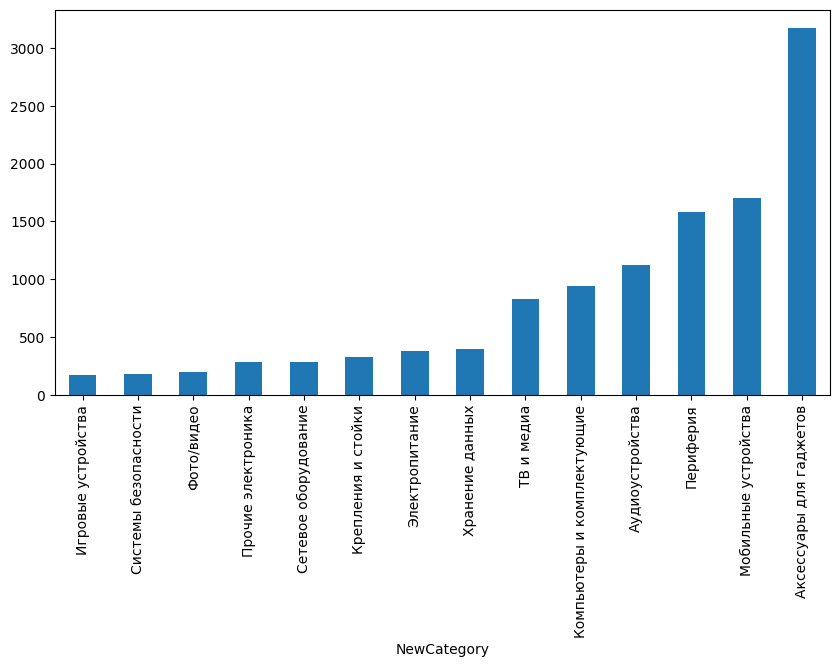

In [27]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(10, 5))
train_df.groupby('NewCategory').Query.count().sort_values().plot.bar(x='NewCategory', y='Query')
plt.xticks(rotation=90)
plt.show()

In [31]:
import pandas as pd

counts = train_df['NewCategory'].value_counts().reset_index()
counts.columns = ['NewCategory', 'count'] 
categories_to_keep=[]
for i in range(len(counts)):  
        categories_to_keep.append(counts.iloc[i]['NewCategory'])
        print(f"{counts.iloc[i]['NewCategory']}: {counts.iloc[i]['count']}")
print(len(categories_to_keep))

Аксессуары для гаджетов: 3173
Мобильные устройства: 1700
Периферия: 1577
Аудиоустройства: 1120
Компьютеры и комплектующие: 944
ТВ и медиа: 828
Хранение данных: 397
Электропитание: 380
Крепления и стойки: 323
Прочие электроника: 286
Сетевое оборудование: 286
Фото/видео: 194
Системы безопасности: 177
Игровые устройства: 173
14


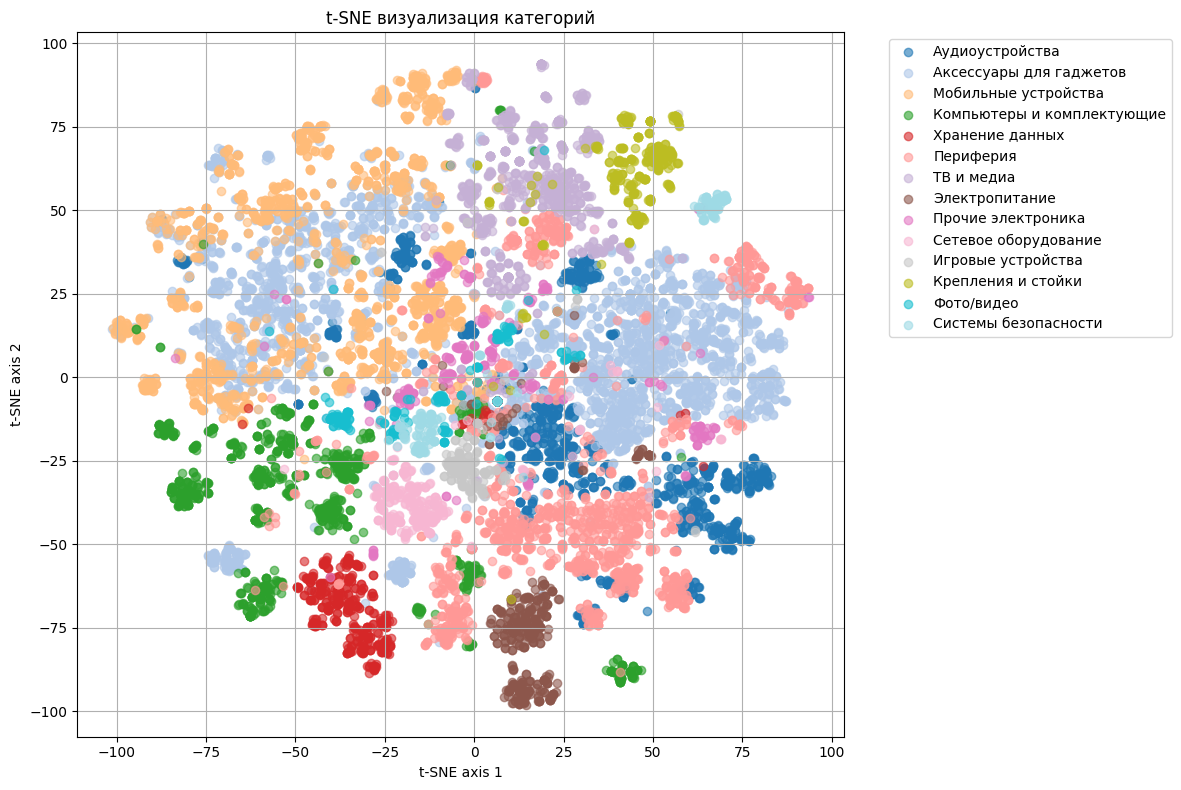

In [48]:
Q = train_df['Query'].apply(preprocess_text)

tfidf = TfidfVectorizer(max_features=10000) 
X = tfidf.fit_transform(Q).toarray()

# Инициализируем t-SNE
tsne = TSNE(
    n_components=2,  
    perplexity=30,    
    random_state=42,
    n_iter=1000
)

X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(12, 8))

# Цвета для каждой категории
categories = train_df["NewCategory"].unique()
colors = plt.cm.tab20(np.linspace(0, 1, len(categories)))

# Рисуем точки для каждой категории
for i, cat in enumerate(categories):
    mask = train_df["NewCategory"] == cat
    plt.scatter(
        X_tsne[mask, 0], 
        X_tsne[mask, 1], 
        c=[colors[i]], 
        label=cat,
        alpha=0.6
    )

plt.title("t-SNE визуализация категорий")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("t-SNE axis 1")
plt.ylabel("t-SNE axis 2")
plt.grid(True)
plt.tight_layout()
plt.show()

In [50]:
import pickle
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight

# Создаем словари для хранения объектов
vectorizers = {}
classifiers = {}
label_encoders = {}

for category_name in new_categories.keys():
    # Фильтруем данные по текущей категории
    df = train_df[train_df['NewCategory'] == category_name]
    
    if df.empty:
        print(f"Нет данных для категории: {category_name}")
        continue

    # Проверка минимального количества примеров
    if len(df) < 5:
        print(f"Слишком мало данных ({len(df)} примеров) для категории: {category_name}")
        continue

    # Предобработка текста
    processed_queries = df['Query'].apply(preprocess_text)
    categories = df['CategoryName']

    # Разделение данных со стратификацией
    try:
        X_train, X_test, y_train, y_test = train_test_split(
            processed_queries, 
            categories,
            test_size=0.2,
            random_state=42,
            stratify=categories
        )
    except ValueError:
        # Если стратификация невозможна из-за малого количества классов
        X_train, X_test, y_train, y_test = train_test_split(
            processed_queries, 
            categories,
            test_size=0.1,
            random_state=42
        )

    # Кодирование меток
    le = LabelEncoder()
    y_train_encoded = le.fit_transform(y_train)
    y_test_encoded = le.transform(y_test)

    # Проверка на количество классов
    if len(np.unique(y_train_encoded)) < 2:
        print(f"Недостаточно классов для обучения модели в категории: {category_name}")
        continue

    # Создание и обучение TF-IDF
    tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
    X_train_tfidf = tfidf.fit_transform(X_train)
    X_test_tfidf = tfidf.transform(X_test)

    # Расчет весов классов
    try:
        class_weights = compute_class_weight(
            'balanced',
            classes=np.unique(y_train_encoded),
            y=y_train_encoded
        )
        class_weight_dict = dict(zip(np.unique(y_train_encoded), class_weights))
    except:
        class_weight_dict = None

    # Обучение модели с учетом весов классов
    try:
        clf = LogisticRegression(
            max_iter=1000,
            random_state=42,
            class_weight=class_weight_dict
        )
        clf.fit(X_train_tfidf, y_train_encoded)

        # Сохраняем объекты
        vectorizers[category_name] = tfidf
        classifiers[category_name] = clf
        label_encoders[category_name] = le

        # Оценка модели
        y_pred = clf.predict(X_test_tfidf)
        
        print(f"\nРезультаты для категории {category_name}:")
        print(classification_report(
            y_test_encoded,
            y_pred,
            labels=np.arange(len(le.classes_)),
            target_names=le.classes_,
            zero_division=0
        ))

    except ValueError as e:
        print(f"Ошибка при обучении модели для категории {category_name}: {e}")


Результаты для категории Мобильные устройства:
                   precision    recall  f1-score   support

Мобильный телефон       0.98      1.00      0.99       244
          Планшет       1.00      0.98      0.99        42
       Умные часы       1.00      0.94      0.97        54

         accuracy                           0.99       340
        macro avg       0.99      0.97      0.98       340
     weighted avg       0.99      0.99      0.99       340


Результаты для категории Аксессуары для гаджетов:
                                           precision    recall  f1-score   support

                                USB flash       1.00      0.86      0.92        14
Держатель/док-станция для порт. устройств       1.00      0.93      0.97        15
     ЗУ/адаптер для портативных устройств       0.96      0.90      0.93        82
                                   Кабель       0.90      0.98      0.94       218
                             Карта памяти       0.94      0.94      0

In [61]:
# Инвертируем словарь для маппинга
category_mapping = {}
for new_cat, old_cats in new_categories.items():
    for old_cat in old_cats:
        category_mapping[old_cat] = new_cat

# Применяем маппинг
train_df["NewCategory"] = train_df["CategoryName"].map(category_mapping)

# Для ненайденных категорий (если есть) заполняем "Прочие электроника"
train_df["NewCategory"] = train_df["NewCategory"].fillna("Прочие электроника")

In [72]:
train_df

,ID,CategoryID,Query,CategoryName,label,NewCategory
0,1,1,edifier,Мультимедиа акустика,1,Аудиоустройства
1,2,2,умная колонка яндекс станция лайт,Портативная акустика,1,Аудиоустройства
2,3,3,чехол iphone 14 pro,Чехол/защитное стекло для телефона,0,Аксессуары для гаджетов
3,4,4,zte,Мобильный телефон,5,Мобильные устройства
4,5,5,ноутбук huawei matebook b3-520 53012kfg,Ноутбук,3,Компьютеры и комплектующие
...,...,...,...,...,...,...
11553,14118,6,ssd диск samsung 980 pro nvme 2tb (mz-v8p2t0bw),Жесткий диск/SSD,12,Хранение данных
11554,14119,42,usb-хаб ugreen cr106 / 20277 (черный),Док-станция/репликатор для ноутбука,7,Прочие электроника
11555,14120,5,ноутбук huawei matebook d14 nbd-wdi9 (космичес...,Ноутбук,3,Компьютеры и комплектующие
11556,14121,10,телевизор samsung ue65au7002uxru,Телевизор,10,ТВ и медиа


In [62]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

le = LabelEncoder()
train_df['label'] = le.fit_transform(train_df['NewCategory'])

# Разделение данных
train, val = train_test_split(train_df, test_size=0.2, random_state=42)

In [63]:
from torch.utils.data import Dataset, DataLoader
from transformers import XLMRobertaTokenizer

tokenizer = XLMRobertaTokenizer.from_pretrained('xlm-roberta-base')
MAX_LEN = 128  # Оптимизируйте под ваши данные

class CustomDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encoding = tokenizer(
            self.texts[idx],
            max_length=MAX_LEN,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(self.labels[idx], dtype=torch.long)
        }

# Создание DataLoader
train_dataset = CustomDataset(train['Query'].tolist(), train['label'].tolist())
val_dataset = CustomDataset(val['Query'].tolist(), val['label'].tolist())

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)

In [64]:
from transformers import XLMRobertaForSequenceClassification, XLMRobertaModel  # Добавлен импорт
import torch.nn as nn
import torch

In [65]:
class CustomXLMRobertaClassifier(nn.Module):
    def __init__(self, num_classes, hidden_dim=512, dropout=0.3):
        super().__init__()

        # Базовый энкодер
        self.roberta = XLMRobertaModel.from_pretrained('xlm-roberta-base')

        # Кастомная классификационная голова
        self.classifier = nn.Sequential(
            nn.Linear(self.roberta.config.hidden_size, hidden_dim),
            nn.ReLU(),
            #nn.Linear(hidden_dim, hidden_dim//2),
            nn.Dropout(dropout),
            nn.ReLU(),
            nn.Linear(hidden_dim, num_classes)
        )

    def forward(self, input_ids, attention_mask):
        # Получаем эмбеддинги
        outputs = self.roberta(input_ids, attention_mask=attention_mask)

        # Берем [CLS] токен
        cls_embedding = outputs.last_hidden_state[:, 0, :]

        # Пропускаем через кастомную голову
        logits = self.classifier(cls_embedding)
        return logits

In [73]:
# Инициализация
model = CustomXLMRobertaClassifier(num_classes=14)

In [74]:
import torch.nn as nn
import torch
from tqdm import tqdm

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5)
criterion = nn.CrossEntropyLoss()

lossval = []
losstrain = []
for epoch in range(10):
    model.train()
    train_loss = 0
    for batch in tqdm(train_loader, desc=f"Epoch {epoch+1} [Train]"):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        logits = model(input_ids, attention_mask)  
        loss = criterion(logits, labels) 

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    # Валидация
    model.eval()
    val_loss = 0
    correct = 0
    with torch.no_grad():
        for batch in tqdm(val_loader, desc=f"Epoch {epoch+1} [Val]"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            logits = model(input_ids, attention_mask) 
            val_loss += criterion(logits, labels).item()
            preds = torch.argmax(logits, dim=1)
            correct += (preds == labels).sum().item()

    lossval.append(val_loss)
    losstrain.append(train_loss)
    # Вывод статистики
    print(f"\nEpoch {epoch+1}")
    print(f"Train Loss: {train_loss/len(train_loader):.4f}")
    print(f"Val Loss: {val_loss/len(val_loader):.4f}")
    print(f"Val Accuracy: {correct/len(val_dataset):.4f}\n")

Epoch 1 [Val]: 100%|█████████████████████████████████████████████████████████████████| 145/145 [00:09<00:00, 14.70it/s]



Epoch 1
Train Loss: 1.7455
Val Loss: 0.7844
Val Accuracy: 0.7993



Epoch 2 [Val]: 100%|█████████████████████████████████████████████████████████████████| 145/145 [00:09<00:00, 14.52it/s]



Epoch 2
Train Loss: 0.6910
Val Loss: 0.4790
Val Accuracy: 0.8798



Epoch 3 [Val]: 100%|█████████████████████████████████████████████████████████████████| 145/145 [00:09<00:00, 14.66it/s]



Epoch 3
Train Loss: 0.4171
Val Loss: 0.3386
Val Accuracy: 0.9148



Epoch 4 [Val]: 100%|█████████████████████████████████████████████████████████████████| 145/145 [00:09<00:00, 14.67it/s]



Epoch 4
Train Loss: 0.2972
Val Loss: 0.2894
Val Accuracy: 0.9247



Epoch 5 [Val]: 100%|█████████████████████████████████████████████████████████████████| 145/145 [00:10<00:00, 13.78it/s]



Epoch 5
Train Loss: 0.2237
Val Loss: 0.2495
Val Accuracy: 0.9356



Epoch 6 [Val]: 100%|█████████████████████████████████████████████████████████████████| 145/145 [00:09<00:00, 14.75it/s]



Epoch 6
Train Loss: 0.1780
Val Loss: 0.2311
Val Accuracy: 0.9416



Epoch 7 [Val]: 100%|█████████████████████████████████████████████████████████████████| 145/145 [00:07<00:00, 20.59it/s]



Epoch 7
Train Loss: 0.1508
Val Loss: 0.2318
Val Accuracy: 0.9403



Epoch 8 [Val]: 100%|█████████████████████████████████████████████████████████████████| 145/145 [00:06<00:00, 21.48it/s]



Epoch 8
Train Loss: 0.1250
Val Loss: 0.2165
Val Accuracy: 0.9472



Epoch 9 [Val]: 100%|█████████████████████████████████████████████████████████████████| 145/145 [00:06<00:00, 21.52it/s]



Epoch 9
Train Loss: 0.0999
Val Loss: 0.2216
Val Accuracy: 0.9498



Epoch 10 [Val]: 100%|████████████████████████████████████████████████████████████████| 145/145 [00:06<00:00, 21.39it/s]


Epoch 10
Train Loss: 0.0853
Val Loss: 0.2186
Val Accuracy: 0.9516



In [75]:
from torch.optim import AdamW

for param in model.roberta.parameters():
    param.requires_grad = False

trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Обучаемых параметров после заморозки: {trainable_params}")

optimizer = AdamW(
    model.classifier.parameters(),  
    lr=1e-6,                       
    weight_decay=0.01
)

for epoch in range(3):
    # Обучение
    model.train()
    train_loss = 0
    for batch in tqdm(train_loader, desc=f"Epoch {epoch+1} [Train]"):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        logits = model(input_ids, attention_mask)  
        loss = criterion(logits, labels)  

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    # Валидация
    model.eval()
    val_loss = 0
    correct = 0
    with torch.no_grad():
        for batch in tqdm(val_loader, desc=f"Epoch {epoch+1} [Val]"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            logits = model(input_ids, attention_mask)  
            val_loss += criterion(logits, labels).item()
            preds = torch.argmax(logits, dim=1)
            correct += (preds == labels).sum().item()
            
    lossval.append(val_loss)
    losstrain.append(train_loss)
    # Вывод статистики
    print(f"\nEpoch {epoch+1}")
    print(f"Train Loss: {train_loss/len(train_loader):.4f}")
    print(f"Val Loss: {val_loss/len(val_loader):.4f}")
    print(f"Val Accuracy: {correct/len(val_dataset):.4f}\n")

Обучаемых параметров после заморозки: 400910


Epoch 1 [Val]: 100%|█████████████████████████████████████████████████████████████████| 145/145 [00:06<00:00, 21.48it/s]



Epoch 1
Train Loss: 0.0587
Val Loss: 0.2190
Val Accuracy: 0.9516



Epoch 2 [Val]: 100%|█████████████████████████████████████████████████████████████████| 145/145 [00:06<00:00, 21.30it/s]



Epoch 2
Train Loss: 0.0613
Val Loss: 0.2192
Val Accuracy: 0.9516



Epoch 3 [Val]: 100%|█████████████████████████████████████████████████████████████████| 145/145 [00:08<00:00, 16.34it/s]


Epoch 3
Train Loss: 0.0602
Val Loss: 0.2197
Val Accuracy: 0.9516



In [76]:
import torch
from sklearn.metrics import classification_report, precision_recall_fscore_support
from tqdm import tqdm

def evaluate_model(model, val_loader, le):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in tqdm(val_loader, desc="Evaluation"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            logits = model(input_ids, attention_mask)
            preds = torch.argmax(logits, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    str_true_labels = le.inverse_transform(all_labels)
    str_pred_labels = le.inverse_transform(all_preds)

    return str_true_labels, str_pred_labels

# Вызов функции
true_labels, pred_labels = evaluate_model(model, val_loader, le)

# Метрики
print("Classification Report:")
print(classification_report(true_labels, pred_labels, digits=4))

# Дополнительные метрики
macro_prec, macro_rec, macro_f1, _ = precision_recall_fscore_support(
    true_labels, pred_labels, average='macro'
)
micro_prec, micro_rec, micro_f1, _ = precision_recall_fscore_support(
    true_labels, pred_labels, average='micro'
)

print("\nMacro Averages:")
print(f"Precision: {macro_prec:.4f}")
print(f"Recall:    {macro_rec:.4f}")
print(f"F1-score:  {macro_f1:.4f}")

print("\nMicro Averages:")
print(f"Precision: {micro_prec:.4f}")
print(f"Recall:    {micro_rec:.4f}")
print(f"F1-score:  {micro_f1:.4f}")

Evaluation: 100%|████████████████████████████████████████████████████████████████████| 145/145 [00:09<00:00, 15.16it/s]


Classification Report:
                            precision    recall  f1-score   support

   Аксессуары для гаджетов     0.9541    0.9584    0.9563       673
           Аудиоустройства     0.9541    0.9244    0.9391       225
        Игровые устройства     0.9722    0.8750    0.9211        40
Компьютеры и комплектующие     0.9773    0.9718    0.9745       177
        Крепления и стойки     1.0000    0.9057    0.9505        53
      Мобильные устройства     0.9528    0.9613    0.9570       336
                 Периферия     0.9187    0.9621    0.9399       317
        Прочие электроника     0.9298    0.8689    0.8983        61
      Сетевое оборудование     0.9273    0.9623    0.9444        53
      Системы безопасности     0.9000    0.9474    0.9231        38
                ТВ и медиа     0.9875    0.9634    0.9753       164
                Фото/видео     0.9706    0.8919    0.9296        37
           Хранение данных     0.9296    0.9565    0.9429        69
            Электропитан

в итоге такого ансамбля получили 0.65(((( 